<a href="https://colab.research.google.com/github/meglee67/datasci_5_statistics/blob/main/HHA507_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [47]:
import pandas as pd
import numpy as np

# Chi-Square Test
from scipy.stats import chi2_contingency
# T-Test
from scipy.stats import ttest_ind
# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Regression Analysis
import matplotlib.pyplot as plt

# 1. Chi-Square Test

In [39]:
diabetesdf = pd.read_csv('diabetes.csv')

In [40]:
# 0 = no diabetes 1 = yes diabetes
diabetesdf['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [41]:
# 0 = No 1 = Yes
diabetesdf['HighChol'].value_counts()

0.0    146089
1.0    107591
Name: HighChol, dtype: int64

In [43]:
contingency_table = pd.crosstab(diabetesdf['Diabetes_binary'], diabetesdf['HighChol'])
print(contingency_table)
# 0 = No 1 = Yes

HighChol            0.0    1.0
Diabetes_binary               
0.0              134429  83905
1.0               11660  23686


In [45]:
contingency_table = pd.crosstab(diabetesdf['Diabetes_binary'], diabetesdf['HighChol'])
contingency_table
# 0 = No 1 = Yes

HighChol,0.0,1.0
Diabetes_binary,,
0.0,134429,83905
1.0,11660,23686


In [50]:
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 10174.074889118883
P-value: 0.0


# Summary
**Question:**
Is there an association between if a person has high cholesterol or not and if they have diabetes or not?

**H0:** There is no relationship between high cholesterol and diabetes (independent variables)

**H1:** There is a relationship between high cholesterol and diabetes (dependent variables)

**Insights**

Testing showed a high Chi2 value of 10174 and a p-value of 0. The high Chi2 value indicates a strong association between high cholesterol and diabetes. The p-value indicates that the observed association between high cholesterol and diabetes is highly statistically significant.

Therefore, based on these results I conclude that there is a significant relationship between high cholesterol and diabetes. People with high cholesterol appear to be more likely to have diabetes.

# T-Test

In [56]:
Obesitydf = pd.read_csv('Obesity.csv')
len(Obesitydf)

2111

In [58]:
# Keeping only complete rows
Obestiydf = Obesitydf.dropna()
len(Obestiydf)

2111

In [59]:
# Count for gender
Obesitydf['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

In [60]:
# FCVC = Number of meals where you usually eat vegetables
male_data = Obesitydf[Obesitydf['Gender'] == 'Male']['FCVC']
female_data = Obesitydf[Obesitydf['Gender'] == 'Female']['FCVC']

print(male_data)
print(female_data)

2       2.000000
3       3.000000
4       2.000000
5       2.000000
7       2.000000
          ...   
1794    2.919526
1795    2.724121
1796    2.801992
1797    2.748971
1798    2.680375
Name: FCVC, Length: 1068, dtype: float64
0       2.0
1       3.0
6       3.0
11      2.0
15      3.0
       ... 
2106    3.0
2107    3.0
2108    3.0
2109    3.0
2110    3.0
Name: FCVC, Length: 1043, dtype: float64


In [62]:
# Assuming unequal variances with Welch's t-test
t_stat, p_val = ttest_ind(female_data, male_data, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 13.088631197898543
P-value: 1.1713837517506213e-37


In [63]:
# Compute means for male and female
Obesity_female_mean = female_data.mean()
Obesity_male_mean = male_data.mean()

In [65]:
print(f"Mean prevalence for female: {Obesity_female_mean}")
print(f"Mean prevalence for male: {Obesity_male_mean}")

Mean prevalence for female: 2.5673194630872485
Mean prevalence for male: 2.274237549625468


# Summary
**Question:**
Is there a difference between females and males concerning number of meals where they usually eat vegetables?

**H0:** There is no difference between females and males in regards to eating vegetables.

**H1:** There is a difference between females and males in regards to eating vegetables.

**Insights**

* T-statistic: 13.088631197898543
* P-value: 1.1713837517506213e-37
* Mean prevalence for female: 2.5673194630872485
* Mean prevalence for male: 2.274237549625468

**T-Statistic**: The t-statistic of 13.0886 is a measure of how many standard errors the sample means are away from each other. A larger t-statistic indicates a greater difference between the groups.

**P-Value**: The p-value of approximately 1.1714e-37 (or very close to zero) is highly significant. In hypothesis testing, a very low p-value (typically below the significance level, often 0.05) leads to the rejection of the null hypothesis.

**Mean Prevalence for Female**: The mean prevalence for females (2.5673) represents the average number of meals where females usually eat vegetables.

**Mean Prevalence for Male**: The mean prevalence for males (2.2742) represents the average number of meals where males usually eat vegetables.

Given the very low p-value, **the null hypothesis (H0) is rejected in favor of the alternative hypothesis (H1)**.

This indicates that there is a statistically significant difference between females and males in terms of their vegetable-eating habits, with females, on average, consuming a higher number of vegetable meals than males.

# ANOVA

In [66]:
eatingdf = pd.read_csv('Obesity.csv')

In [71]:
# Define a formula for the ANOVA test
# FCVC (Number of meals with vegetables) vs. CAEC (Eating food between meals)
formula = 'FCVC ~ C(CAEC)'

In [72]:
# Create a model
model = ols(formula, data=eatingdf).fit()

In [73]:
# Perform the ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

In [74]:
# Print the ANOVA test results
print("ANOVA Test Results:")
print(anova_table)

ANOVA Test Results:
              sum_sq      df         F    PR(>F)
C(CAEC)     7.776341     3.0  9.198652  0.000005
Residual  593.737377  2107.0       NaN       NaN


# Summary
**Question:**
Is there a difference in people eating in between meals depending on how many  meals where they usually eat vegetables?

**H0:** There is no difference between people eating in between meals depending on the number of meals where they usually eat vegetables.

**H1:** There is a difference between people eating in between meals depending on the number of meals where they usually eat vegetables.

**Insights**
* F-value: 9.198652
* P-value: 0.000005

Since the p-value is less than the significance level (0.05) we reject the null hypothesis.

There is a significant difference in the number of vegetable meals among different levels of eating between meals.

# Regression Analysis

In [77]:
awdf = pd.read_csv('Obesity.csv')

In [78]:
# Define the dependent and independent variables
X = awdf['Age']
y = awdf['Weight']

In [79]:
# Add a constant to the independent variable (required for the statsmodels regression model)
X = sm.add_constant(X)

In [80]:
# Fit the regression model
model = sm.OLS(y, X).fit()

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     90.24
Date:                Sat, 14 Oct 2023   Prob (F-statistic):           5.52e-21
Time:                        06:12:45   Log-Likelihood:                -9844.0
No. Observations:                2111   AIC:                         1.969e+04
Df Residuals:                    2109   BIC:                         1.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.2605      2.211     29.964      0.0

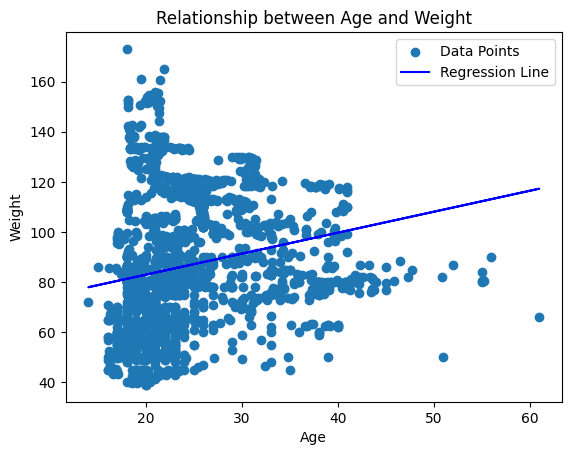

In [81]:
# Print the summary of the regression
print(model.summary())

plt.scatter(awdf['Age'], awdf['Weight'], label='Data Points')
plt.plot(awdf['Age'], model.predict(X), color='blue', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Relationship between Age and Weight')
plt.legend()
plt.show()

# Summary
**Question:**
Is there a relationship between age (independent) and weight (dependent)?

**H0:** There is no difference between people eating in between meals depending on the number of meals where they usually eat vegetables.

**H1:** There is a difference between people eating in between meals depending on the number of meals where they usually eat vegetables.

**Insights**
* R-squared: 0.041
  * The R-squared value is a measure of the goodness of fit of the regression model.
* **F-statistic** is 90.24, and the associated probability (Prob (F-statistic)) is very close to zero (5.52e-21)
* The **p-values** associated with the coefficients represent the significance of each coefficient.
  * In this case, both the constant and age coefficients have low p-values (both less than 0.05), indicating their statistical significance.

The results above indicate that there is a statistically significant relationship between age and weight.

However, the low R-squared value suggests that age explains only a small portion of the variance in weight meaning that other factors not included in the model may also influence weight.